In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


In [2]:
video = cv2.VideoCapture('001v.mp4')

# ShiTomasi corner detection
config_st = {'maxCorners': 100,
             'qualityLevel': 0.3,
             'minDistance': 7,
             'blockSize': 7}

# Lucas-Kanade optical flow
config_lk = {'winSize': (15, 15),
             'maxLevel': 2,
             'criteria': (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)}

In [3]:
# Create some random colors
color = np.random.randint(0, 255, (100, 3))

# Take first frame and find keypoints
ret, source = video.read()
assert ret

src_gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
p_src = cv2.goodFeaturesToTrack(src_gray, mask=None, **config_st)

In [4]:
# Fast forward by 40 frames
for _ in range(40):
    ret, frame = video.read()
    assert ret

In [5]:
# Read next frame
ret, target = video.read()
dst_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

# Calculate optical flow
p_dst, status, err = cv2.calcOpticalFlowPyrLK(src_gray, dst_gray, p_src, None, **config_lk)

# Select points that have been successfully tracked
if p_dst is not None:
    p_dst = p_dst[status==1]
    p_src = p_src[status==1]

In [6]:
# Create an empty mask image for drawing purposes
mask = np.zeros_like(source)

# Draw the tracks
for i, (dst, src) in enumerate(zip(p_dst, p_src)):
    x_dst, y_dst = dst
    x_src, y_src = src

    mask = cv2.arrowedLine(mask, (int(x_src), int(y_src)), (int(x_dst), int(y_dst)),
                           color[i].tolist(), 2, tipLength=0.5)
    target = cv2.circle(target, (int(x_src), int(y_src)), 5, color[i].tolist(), -1)

result = cv2.add(target, mask)

(<Axes: title={'center': 'Target'}>,
 Text(0.5, 1.0, 'Target'))

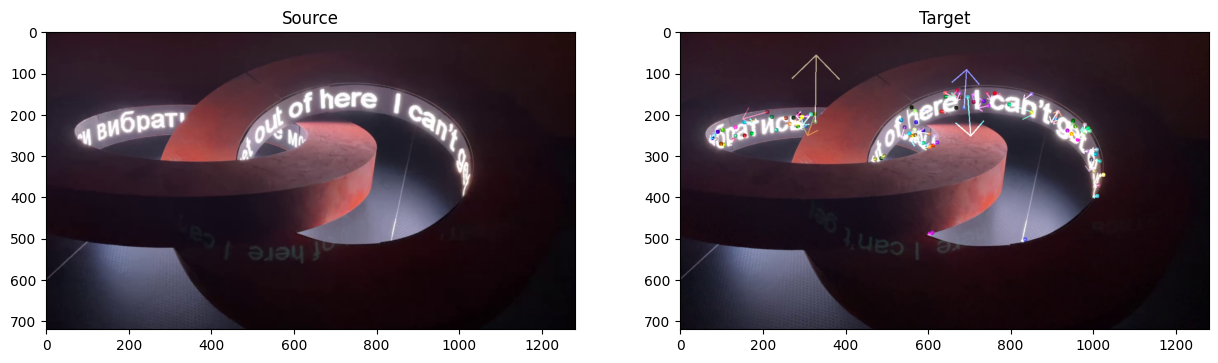

In [7]:
plt.subplot(121), plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB)), plt.title('Source')
plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Target')

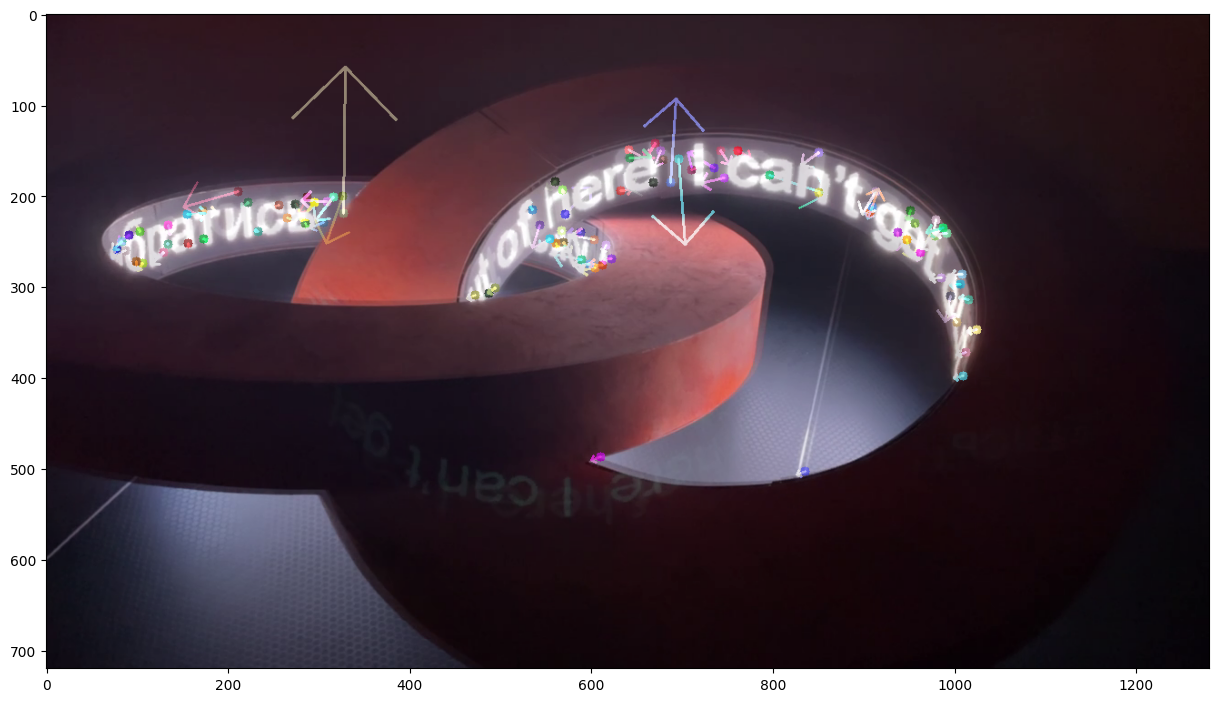

In [8]:
compound = cv2.addWeighted(result, 0.75, source, 0.25, gamma=0)
plt.imshow(cv2.cvtColor(compound, cv2.COLOR_BGR2RGB))